# Importo le librerie necessarie

In [1]:
import re
import matplotlib.pyplot as plt


FILENAME = "28_mers_result_with_canonical.txt"

# Divide il testo in blocchi e vado ad estrarre:
    # 1. Required memory size in MB
    # 2. Total insertion
    # 3. Elapsed Time of insertion
 Successivamente calcolo: Number of insertion per second = Total insertion / Elapsed Time

In [2]:
def parse_blocks(text):
    results = []

    # Dividi il testo in blocchi usando "###########"
    blocks = text.split("###########")

    for idx, block in enumerate(blocks):
        # Salta blocchi vuoti o che non contengono dati
        if not block.strip() or 'Kmer length' not in block:
            continue

        print(f"\n--- Analizzando blocco {idx} ---")

        try:
            # Estrai Elapsed Time of insertion
            time_match = re.search(r'Elapsed Time of insertion:\s*([\d,\.]+)', block)
            if not time_match:
                print("Elapsed Time non trovato")
                continue
            elapsed_time = float(time_match.group(1).replace(',', '.'))
            print(f"Elapsed Time: {elapsed_time}")

            # Estrai Insertion rate
            rate_match = re.search(r'Number of Insertion/Second:\s*([\d,\.]+)', block)
            if not rate_match:
                print("Insertion rate non trovato")
                continue
            rate_str = rate_match.group(1)
            # Gestisce formato: 1505533,549 o 1.505.533,549
            insertion_rate = float(rate_str.replace('.', '').replace(',', '.'))
            print(f"Insertion rate: {insertion_rate}")

            # Estrai Memory MB - PRIMO valore (memoria effettiva)
            # Pattern più robusto che gestisce sia spazi che tab
            mem_match = re.search(r'Required memory size in bits and MB:\s*\d+\s+([\d,\.]+)\s*MB', block)
            if not mem_match:
                print("Memory non trovata")
                continue
            memory_mb = float(mem_match.group(1).replace(',', '.'))
            print(f"Memory: {memory_mb} MB")

            results.append((memory_mb, insertion_rate, elapsed_time))
            print(f"Blocco estratto con successo!")

        except (ValueError, AttributeError) as e:
            print(f"Errore: {e}")
            continue

    return results

# Effettuo il barplot e lo scatterplot

Lettura del file: 28_mers_result_with_canonical.txt

File letto con successo!
Dimensione: 1940 caratteri

--- Analizzando blocco 2 ---
Elapsed Time: 20.887
Insertion rate: 2396486.714
Memory: 22.07 MB
Blocco estratto con successo!

--- Analizzando blocco 4 ---
Elapsed Time: 43.614
Insertion rate: 2295383.042
Memory: 43.32 MB
Blocco estratto con successo!

--- Analizzando blocco 6 ---
Elapsed Time: 79.237
Insertion rate: 2526870.944
Memory: 86.44 MB
Blocco estratto con successo!

--- Analizzando blocco 8 ---
Elapsed Time: 132.386
Insertion rate: 3024816.416
Memory: 44.12 MB
Blocco estratto con successo!

RIEPILOGO: 4 blocchi estratti
Blocco 1: Memory=22.07 MB, Rate=2396487 ins/s, Time=20.89 s
Blocco 2: Memory=43.32 MB, Rate=2295383 ins/s, Time=43.61 s
Blocco 3: Memory=86.44 MB, Rate=2526871 ins/s, Time=79.24 s
Blocco 4: Memory=44.12 MB, Rate=3024816 ins/s, Time=132.39 s



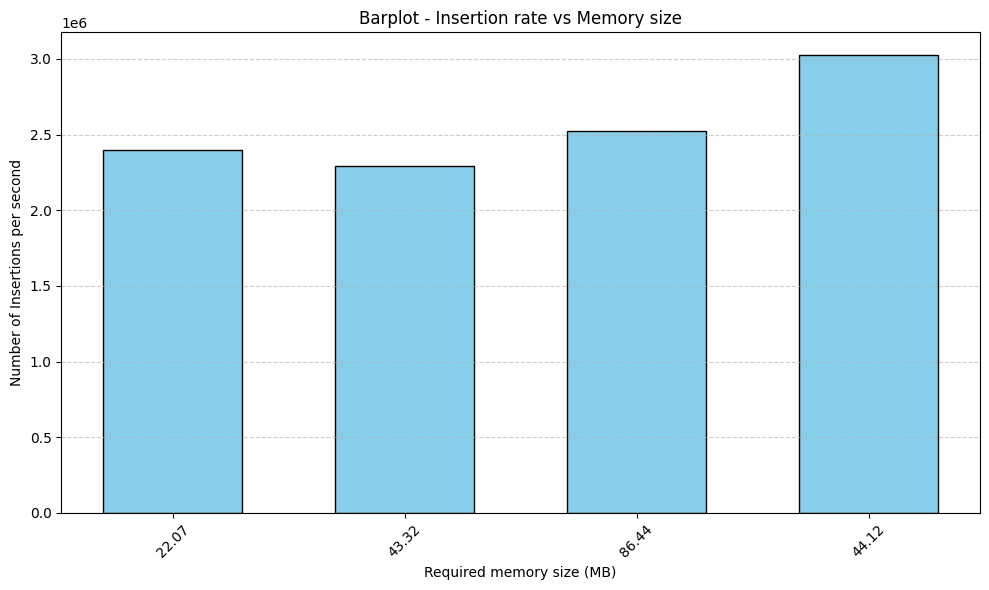

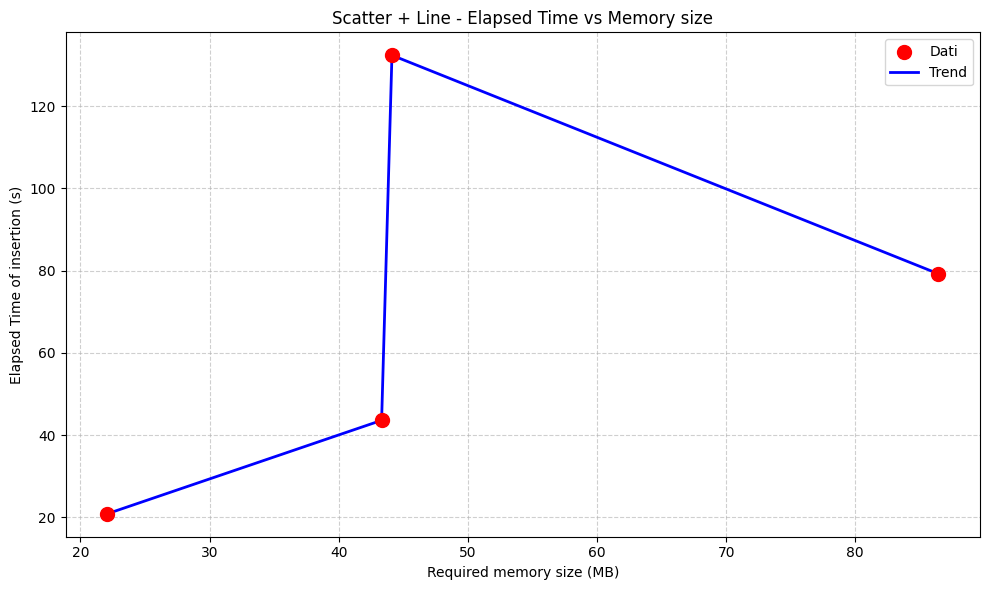

In [3]:
def plot_results(results):
    """
    Crea i grafici dai dati estratti.
    """
    if not results:
        raise SystemExit("Nessun dato valido trovato nel file. Controlla il formato.")

    sizes, insertion_rates, elapsed_times = zip(*results)

    print(f"\n{'='*60}")
    print(f"RIEPILOGO: {len(results)} blocchi estratti")
    print(f"{'='*60}")
    for i, (size, rate, time) in enumerate(results, 1):
        print(f"Blocco {i}: Memory={size:.2f} MB, Rate={rate:.0f} ins/s, Time={time:.2f} s")
    print(f"{'='*60}\n")

    # --- BARPLOT ---
    indices = list(range(len(sizes)))
    plt.figure(figsize=(10, 6))
    plt.bar(indices, insertion_rates, width=0.6, color='skyblue', edgecolor='black')
    plt.xticks(indices, [f"{s:.2f}" for s in sizes], rotation=45)
    plt.xlabel("Required memory size (MB)")
    plt.ylabel("Number of Insertions per second")
    plt.title("Barplot - Insertion rate vs Memory size")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # --- SCATTER + LINE con Elapsed Time ---
    sorted_pairs = sorted(zip(sizes, elapsed_times), key=lambda x: x[0])
    sizes_sorted, times_sorted = zip(*sorted_pairs)

    plt.figure(figsize=(10, 6))
    plt.scatter(sizes_sorted, times_sorted, color='red', s=100, label='Dati', zorder=3)
    plt.plot(sizes_sorted, times_sorted, color='blue', linestyle='-', linewidth=2, label='Trend')
    plt.xlabel("Required memory size (MB)")
    plt.ylabel("Elapsed Time of insertion (s)")
    plt.title("Scatter + Line - Elapsed Time vs Memory size")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# Main execution
if __name__ == "__main__":
    print(f"Lettura del file: {FILENAME}\n")

    try:
        with open(FILENAME, "r", encoding="utf-8") as f:
            text = f.read()

        print("File letto con successo!")
        print(f"Dimensione: {len(text)} caratteri")

        # Parse dei dati
        results = parse_blocks(text)

        # Creazione dei grafici
        plot_results(results)

    except FileNotFoundError:
        print(f"Errore: File '{FILENAME}' non trovato!")
    except Exception as e:
        print(f"Errore imprevisto: {e}")